In [1]:
import matplotlib.pyplot as plt

from clip.clip import load
from concept_extraction.concept_extraction import load_concepts, load_sae, prepare_image, extract_concepts

In [2]:
concept_names = load_concepts("concept_names/clip_ViT-B_16_concept_names.csv")

In [3]:
ViT_B_16_clip, image_transfrom = load("ViT-B/16")

In [4]:
sparse_autoencoder = load_sae("sae_checkpoints/clip_ViT-B_16_sparse_autoencoder_final.pt")

In [5]:
image, image_transformed = prepare_image("sample_image.JPEG", image_transfrom)

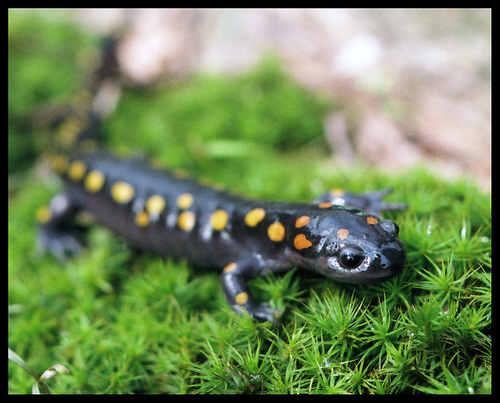

In [6]:
image

In [8]:
N_CONCEPTS = 10

top_n_concept_activations, top_n_concept_names = extract_concepts(n_concepts=N_CONCEPTS,
                                                                  concept_names=concept_names,
                                                                  image_transformed=image_transformed,
                                                                  clip_model=ViT_B_16_clip,
                                                                  sae=sparse_autoencoder)

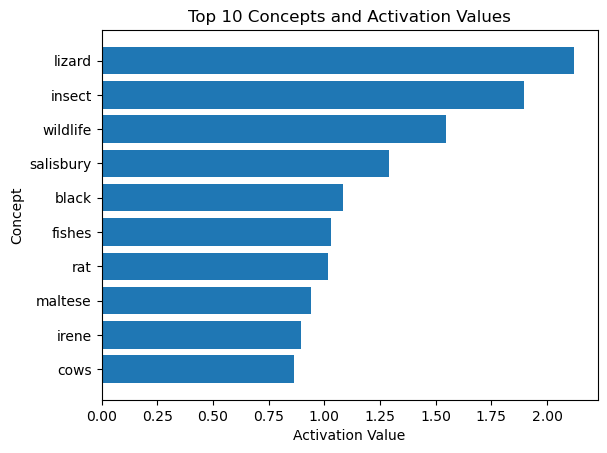

In [9]:
plt.barh(top_n_concept_names, top_n_concept_activations)
plt.xlabel('Activation Value')
plt.ylabel('Concept')
plt.title(f'Top {N_CONCEPTS} Concepts and Activation Values')
plt.show()